# Linear Regression with Python Scikit Learn

Requirements: Develop a linear regression model predicting the percentage score of a student based on the number of hours they study. This is a simple simple linear regression task that includes only two variables: hours of study and percentage score.

## Simple Linear Regression


In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


We will first plot our data points on a 2-D graph to observe our dataset to see if there is any relationship between the data

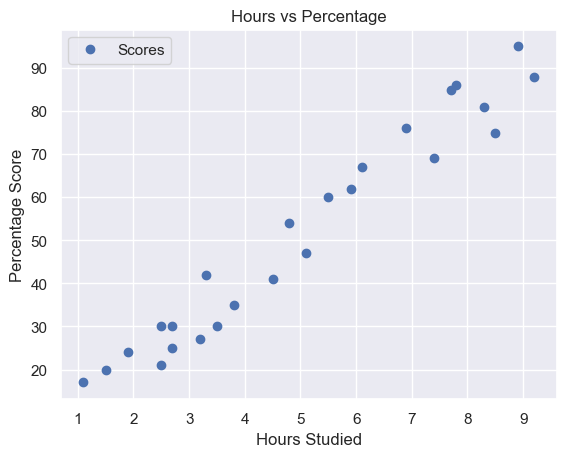

In [11]:
# Data Visualization
sns.set(style="darkgrid")
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


## Preparing the data
We will now divide the data into attributes and labels

In [12]:
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:,1].values

Next, we will split the data into training and testing sets

The graph above shows that there is a **positive linear relation** between the number of hours studied and the percentage of score. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

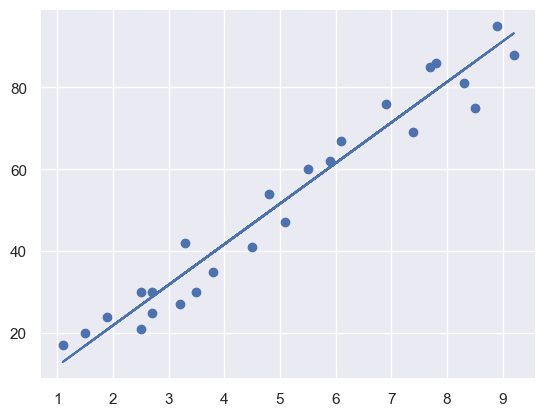

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_ # According to the linear equation

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [20]:
print(X_test)
y_pred = regressor.predict(X_test) #Predicting the scores

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# Test with chosen input, let's say we want to predict the score of 9.25 hours studied
hours = 9.25

own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating the model

In [26]:
from sklearn import metrics
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.183859899002982


MAE of roughly 4.18 means that on average, the difference between the actual scores and the predicted scores is about 4.18 percentage points